# Librerias para todos los modelos

In [ ]:
import pandas as pd
import time
import warnings
from pathlib import Path
from joblib import load, dump
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier



Formula de F1-Macro

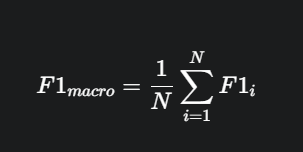

# "Explicacion de el f1-macro"

Trata a todas las clases por igual, sin importar cuántos datos tengan. Calcula el F1 para cada clase y luego saca un promedio simple.

Filosofía: "La clase A con 10 ejemplos es tan importante como la clase B con 10,000 ejemplos".

Efecto: Si tu modelo es malo prediciendo la clase pequeña, el F1-Macro caerá drásticamente, castigando al modelo.

# "Modelo Regresion logistica"

In [4]:

ARTIFACTS_DIR = Path(r"C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all")
OUTPUT_FILE = ARTIFACTS_DIR / "comparativa_modelos_f1macro.xlsx"

results = []

print(f"Buscando archivos en: {ARTIFACTS_DIR}")

if not ARTIFACTS_DIR.exists():
    print("ERROR: La ruta sigue sin encontrarse. Verifica que la carpeta exista.")
else:
    print("Carpeta encontrada. Iniciando entrenamiento masivo (Optimizando F1-Macro)...\n")
    
    count_models = 0
    
   
    for variant_dir in ARTIFACTS_DIR.iterdir():
        if not variant_dir.is_dir():
            continue
        variant_name = variant_dir.name
        
        
        for repr_dir in variant_dir.iterdir():
            if not repr_dir.is_dir():
                continue
            repr_name = repr_dir.name
            
           
            x_tr_files = list(repr_dir.glob("X_train_*.pkl"))
            x_te_files = list(repr_dir.glob("X_test_*.pkl"))
            
            if not x_tr_files or not x_te_files:
                continue

            print(f"Procesando: [{variant_name}] - [{repr_name}]...", end=" ")
            
            try:
                
                X_train = load(x_tr_files[0])
                X_test  = load(x_te_files[0])
                y_train = load(repr_dir / "y_train.pkl")
                y_test  = load(repr_dir / "y_test.pkl")

               
                clf = LogisticRegression(
                    C=1.0, 
                    solver='liblinear', 
                    random_state=42, 
                    class_weight='balanced',
                    multi_class='ovr'
                )
                
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                train_time = time.time() - start_time

                
                y_pred = clf.predict(X_test)
                
                # Usamos average='macro'
                f1_macro = f1_score(y_test, y_pred, average='macro') 
                acc = accuracy_score(y_test, y_pred)

                print(f"-> F1 Macro: {f1_macro:.4f}")

                results.append({
                    "Variante": variant_name,
                    "Representacion": repr_name,
                    "Modelo": "LogReg",
                    "Accuracy": acc,
                    "F1_Macro": f1_macro,  
                    "Train_Time_Sec": round(train_time, 2),
                    "Num_Features": X_train.shape[1]
                })
                count_models += 1

            except Exception as e:
                print(f"\n   ❌ Error: {e}")

    
    if results:
        df_results = pd.DataFrame(results)
        
        df_results = df_results.sort_values(by="F1_Macro", ascending=False)
        
        print("\n" + "="*40)
        print("🏆 TOP 5 MODELOS (Por F1-Macro)")
        print("="*40)
        print(df_results[["Variante", "Representacion", "F1_Macro", "Num_Features"]].head(5))
        
        df_results.to_excel(OUTPUT_FILE, index=False)
        print(f"\nReporte guardado en: {OUTPUT_FILE}")
    else:
        print("\nNo se entrenaron modelos.")

Buscando archivos en: C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all
Carpeta encontrada. Iniciando entrenamiento masivo (Optimizando F1-Macro)...

Procesando: [all_on] - [binary]... -> F1 Macro: 0.4753
Procesando: [all_on] - [count]... -> F1 Macro: 0.4740
Procesando: [all_on] - [tfidf]... -> F1 Macro: 0.4950
Procesando: [all_on] - [tfidf_extras]... -> F1 Macro: 0.4937
Procesando: [minimal] - [binary]... -> F1 Macro: 0.4753
Procesando: [minimal] - [count]... -> F1 Macro: 0.4740
Procesando: [minimal] - [tfidf]... -> F1 Macro: 0.4950
Procesando: [no_accents] - [binary]... -> F1 Macro: 0.4753
Procesando: [no_accents] - [count]... -> F1 Macro: 0.4740
Procesando: [no_accents] - [tfidf]... -> F1 Macro: 0.4950
Procesando: [no_emoji_feats] - [binary]... -> F1 Macro: 0.4753
Procesando: [no_emoji_feats] - [count]... -> F1 Macro: 0.4740
Procesando: [no_emoji_feats] - [tfidf]... -> F1 Macro: 0.4950
Procesando: [no_en2es] - [binary]... -> F1 Macro: 0.4753
Proce

# Modelo Naive Bayes

In [6]:

ARTIFACTS_DIR = Path(r"C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all")
OUTPUT_FILE = ARTIFACTS_DIR / "resultados_NaiveBayes_f1macro.xlsx"

warnings.filterwarnings("ignore")

results = []

print(f"Iniciando entrenamiento Naive Bayes (F1-Macro) en: {ARTIFACTS_DIR}\n")

if not ARTIFACTS_DIR.exists():
    print("ERROR: No se encuentra la carpeta. Verifica la ruta.")
else:
    
    for variant_dir in ARTIFACTS_DIR.iterdir():
        if not variant_dir.is_dir(): continue
        variant_name = variant_dir.name
        
       
        for repr_dir in variant_dir.iterdir():
            if not repr_dir.is_dir(): continue
            repr_name = repr_dir.name
            
            x_tr_files = list(repr_dir.glob("X_train_*.pkl"))
            x_te_files = list(repr_dir.glob("X_test_*.pkl"))
            
            if not x_tr_files or not x_te_files: continue

            try:
                
                X_train = load(x_tr_files[0])
                X_test  = load(x_te_files[0])
                y_train = load(repr_dir / "y_train.pkl")
                y_test  = load(repr_dir / "y_test.pkl")
                
            
                if np.min(X_train) < 0:
                    print(f" Saltando {variant_name}/{repr_name}: Contiene valores negativos (incompatible con NB).")
                    continue

                print(f"Procesando NB: [{variant_name}] - [{repr_name}]...", end=" ")

                
                clf = MultinomialNB(alpha=1.0)
                
               
                start_time = time.time()
                clf.fit(X_train, y_train)
                train_time = time.time() - start_time
                
                
                y_pred = clf.predict(X_test)
                
                #average='macro'
                f1_macro = f1_score(y_test, y_pred, average='macro')
                acc = accuracy_score(y_test, y_pred)
                
                print(f"-> F1 Macro: {f1_macro:.4f}")
                
                
                results.append({
                    "Variante": variant_name,
                    "Representacion": repr_name,
                    "Modelo": "NaiveBayes",
                    "F1_Macro": f1_macro, 
                    "Accuracy": acc,
                    "Tiempo_Seg": round(train_time, 4),
                    "Num_Features": X_train.shape[1]
                })

            except Exception as e:
                print(f"\n    Error: {e}")

    
    if results:
        df_results = pd.DataFrame(results)
        
        df_results = df_results.sort_values(by="F1_Macro", ascending=False)
        
        print("\n" + "="*40)
        print("🏆 TOP 5 RESULTADOS NAIVE BAYES (Macro)")
        print("="*40)
        print(df_results[["Variante", "Representacion", "F1_Macro", "Accuracy"]].head(5))
        
        df_results.to_excel(OUTPUT_FILE, index=False)
        print(f"\nReporte guardado en: {OUTPUT_FILE}")
    else:
        print("\nNo se encontraron modelos para entrenar.")

Iniciando entrenamiento Naive Bayes (F1-Macro) en: C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all

Procesando NB: [all_on] - [binary]... -> F1 Macro: 0.2952
Procesando NB: [all_on] - [count]... -> F1 Macro: 0.3794
Procesando NB: [all_on] - [tfidf]... -> F1 Macro: 0.1848
Procesando NB: [all_on] - [tfidf_extras]... -> F1 Macro: 0.1950
Procesando NB: [minimal] - [binary]... -> F1 Macro: 0.2952
Procesando NB: [minimal] - [count]... -> F1 Macro: 0.3794
Procesando NB: [minimal] - [tfidf]... -> F1 Macro: 0.1848
Procesando NB: [no_accents] - [binary]... -> F1 Macro: 0.2952
Procesando NB: [no_accents] - [count]... -> F1 Macro: 0.3794
Procesando NB: [no_accents] - [tfidf]... -> F1 Macro: 0.1848
Procesando NB: [no_emoji_feats] - [binary]... -> F1 Macro: 0.2952
Procesando NB: [no_emoji_feats] - [count]... -> F1 Macro: 0.3794
Procesando NB: [no_emoji_feats] - [tfidf]... -> F1 Macro: 0.1848
Procesando NB: [no_en2es] - [binary]... -> F1 Macro: 0.2952
Procesando 

# Modelo SVM (Support Vector Machine)

In [2]:

ARTIFACTS_DIR = Path(r"C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all")
OUTPUT_FILE = ARTIFACTS_DIR / "resultados_SVM_f1macro.xlsx"

warnings.filterwarnings("ignore")

results = []

print(f"Iniciando entrenamiento SVM (F1-Macro) en: {ARTIFACTS_DIR}\n")

if not ARTIFACTS_DIR.exists():
    print("ERROR: No se encuentra la carpeta. Verifica la ruta.")
else:
   
    for variant_dir in ARTIFACTS_DIR.iterdir():
        if not variant_dir.is_dir(): continue
        variant_name = variant_dir.name
        
        
        for repr_dir in variant_dir.iterdir():
            if not repr_dir.is_dir(): continue
            repr_name = repr_dir.name
            
            
            x_tr_files = list(repr_dir.glob("X_train_*.pkl"))
            x_te_files = list(repr_dir.glob("X_test_*.pkl"))
            
            if not x_tr_files or not x_te_files: continue

            try:
                
                X_train = load(x_tr_files[0])
                X_test  = load(x_te_files[0])
                y_train = load(repr_dir / "y_train.pkl")
                y_test  = load(repr_dir / "y_test.pkl")
                
                print(f"Procesando SVM: [{variant_name}] - [{repr_name}]...", end=" ")

                
                clf = LinearSVC(
                    C=1.0,                  
                    class_weight='balanced', 
                    dual='auto',            
                    random_state=42,
                    max_iter=2000           
                )
                
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                train_time = time.time() - start_time
                
                
                y_pred = clf.predict(X_test)
                
                # average='macro'
                f1_macro = f1_score(y_test, y_pred, average='macro')
                acc = accuracy_score(y_test, y_pred)
                
                print(f"-> F1 Macro: {f1_macro:.4f}")
                
            
                results.append({
                    "Variante": variant_name,
                    "Representacion": repr_name,
                    "Modelo": "LinearSVC",
                    "F1_Macro": f1_macro,   
                    "Accuracy": acc,
                    "Tiempo_Seg": round(train_time, 3),
                    "Num_Features": X_train.shape[1]
                })

            except Exception as e:
                print(f"\n   ❌ Error: {e}")

    
    if results:
        df_results = pd.DataFrame(results)
        
        df_results = df_results.sort_values(by="F1_Macro", ascending=False)
        
        print("\n" + "="*40)
        print("🏆 TOP 5 RESULTADOS SVM (Macro)")
        print("="*40)
        print(df_results[["Variante", "Representacion", "F1_Macro", "Accuracy"]].head(5))
        
        df_results.to_excel(OUTPUT_FILE, index=False)
        print(f"\nReporte guardado en: {OUTPUT_FILE}")
    else:
        print("\nNo se encontraron modelos para entrenar.")

Iniciando entrenamiento SVM (F1-Macro) en: C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all

Procesando SVM: [all_on] - [binary]... -> F1 Macro: 0.4453
Procesando SVM: [all_on] - [count]... -> F1 Macro: 0.4595
Procesando SVM: [all_on] - [tfidf]... -> F1 Macro: 0.4952
Procesando SVM: [all_on] - [tfidf_extras]... -> F1 Macro: 0.4923
Procesando SVM: [minimal] - [binary]... -> F1 Macro: 0.4453
Procesando SVM: [minimal] - [count]... -> F1 Macro: 0.4595
Procesando SVM: [minimal] - [tfidf]... -> F1 Macro: 0.4952
Procesando SVM: [no_accents] - [binary]... -> F1 Macro: 0.4453
Procesando SVM: [no_accents] - [count]... -> F1 Macro: 0.4595
Procesando SVM: [no_accents] - [tfidf]... -> F1 Macro: 0.4952
Procesando SVM: [no_emoji_feats] - [binary]... -> F1 Macro: 0.4453
Procesando SVM: [no_emoji_feats] - [count]... -> F1 Macro: 0.4595
Procesando SVM: [no_emoji_feats] - [tfidf]... -> F1 Macro: 0.4952
Procesando SVM: [no_en2es] - [binary]... -> F1 Macro: 0.4453
Proce

# "Resultados"

In [4]:
ARTIFACTS_DIR = Path(r"C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all")
FINAL_OUTPUT_FILE = ARTIFACTS_DIR / "TABLA_COMPARATIVA_FINAL.xlsx"


files_to_merge = [
    "resultados_SVM_f1macro.xlsx",
    "resultados_NaiveBayes_f1macro.xlsx",
    "comparativa_modelosf1macro.xlsx", 
    
]

dfs = []

print(f"🔍 Buscando reportes en: {ARTIFACTS_DIR}\n")


for filename in files_to_merge:
    file_path = ARTIFACTS_DIR / filename
    if file_path.exists():
        try:
            df = pd.read_excel(file_path)
            dfs.append(df)
            print(f"    Cargado: {filename} ({len(df)} registros)")
        except Exception as e:
            print(f"    Error al leer {filename}: {e}")
    else:
        print(f"    No encontrado: {filename} (Tal vez no ejecutaste esa celda)")
if dfs:
    full_df = pd.concat(dfs, ignore_index=True)
    
    
    full_df = full_df.sort_values(by="F1_Macro", ascending=False)
    
    print("\n" + "="*60)
    print(" RANKING GLOBAL DE TODOS LOS MODELOS")
    print("="*60)
    
    
    columns_to_show = ["Modelo", "Variante", "Representacion", "F1_Macro", "Accuracy", "Tiempo_Seg"]
    
    cols = [c for c in columns_to_show if c in full_df.columns]
    
    print(full_df[cols].head(15).to_string(index=False))
    
    full_df.to_excel(FINAL_OUTPUT_FILE, index=False)
    print(f"\n Tabla consolidada guardada en: {FINAL_OUTPUT_FILE}")
else:
    print("\n No se cargaron datos. Verifica que hayas ejecutado las celdas anteriores.")

🔍 Buscando reportes en: C:\Users\alass\OneDrive - Instituto Politecnico Nacional\Desktop\PLN_P4\artifacts_all

    Cargado: resultados_SVM_f1macro.xlsx (28 registros)
    Cargado: resultados_NaiveBayes_f1macro.xlsx (28 registros)
    No encontrado: comparativa_modelosf1macro.xlsx (Tal vez no ejecutaste esa celda)

 RANKING GLOBAL DE TODOS LOS MODELOS
   Modelo       Variante Representacion  F1_Macro  Accuracy  Tiempo_Seg
LinearSVC         all_on          tfidf  0.495227  0.736389       3.030
LinearSVC        minimal          tfidf  0.495227  0.736389       3.270
LinearSVC     no_accents          tfidf  0.495227  0.736389       3.352
LinearSVC no_emoji_feats          tfidf  0.495227  0.736389       3.069
LinearSVC     no_negjoin          tfidf  0.495227  0.736389       3.045
LinearSVC       no_lemma          tfidf  0.495227  0.736389       3.166
LinearSVC   no_stopwords          tfidf  0.495227  0.736389       2.916
LinearSVC         no_sel          tfidf  0.495227  0.736389       3.246